## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
combined_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [75]:

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
index_drug = combined_study.groupby("Drug Regimen")
#grouped_drug['Tumor Volume (mm3)'].describe()
mean = index_drug['Tumor Volume (mm3)'].mean()
median = index_drug['Tumor Volume (mm3)'].median()
variance = index_drug['Tumor Volume (mm3)'].var()
std = index_drug['Tumor Volume (mm3)'].std()
sem_tumor = index_drug['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({"Mean": mean,
                             "Median": median,
                             "Variance": variance,
                             "Standard Deviation": std,
                             "SEM": sem_tumor})
summary_table



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

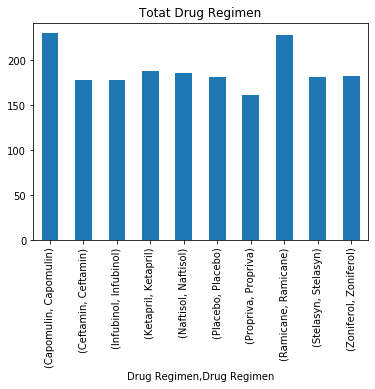

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
x_axis = grouped_drug["Drug Regimen"]                   #.index.values
y_axis = grouped_drug["Drug Regimen"].value_counts()


#df = grouped_drug(grouped_drug,columns=[x_axis, y_axis])
y_axis.plot(x=x_axis, y=y_axis, kind= 'bar')

#drug_bar = drug_bar.set_index("Mouse ID")

#drug_bar.plot(x ='Drug Regimen', y={drug_count}, kind = 'bar')


# Set a title for the chart
plt.title("Totat Drug Regimen")

plt.show()
plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

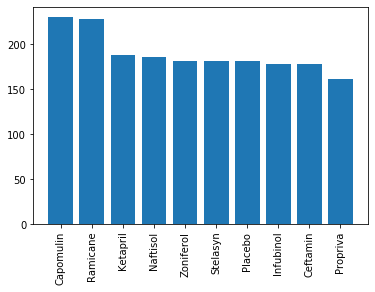

In [37]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = combined_study["Drug Regimen"].value_counts()

#x_axis = combined_study["Drug Regimen"].index.values
#y_axis = combined_study["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values)

#plt.figure(figsize=(20,3))
#plt.bar(x_axis, combined_study['Drug Regimen'], color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")


## Pie plots

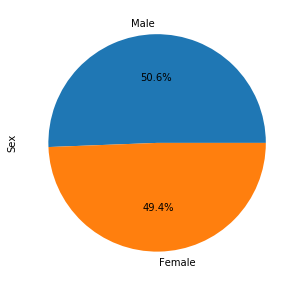

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = combined_study['Sex']
sex_counts = combined_study['Sex'].value_counts()
#sex_counts = pd.DataFrame({'Male': sex_counts['Male'],
                          #'Female': sex_counts['Female']},
                          #index=['Male', 'Female'])
plot = sex_counts.plot.pie(subplots=True, figsize=(5,5), autopct='%1.1f%%')




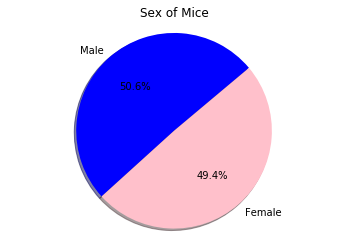

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = combined_study['Sex'].value_counts()
sex = ["Male", "Female"]
colors = ["blue", "pink"]

plt.title("Sex of Mice")
plt.pie(sex_counts, explode=None, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=40)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [253]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
grouped_df = combined_study.groupby('Mouse ID').max()
grouped_df.head
grouped_df = grouped_df.reset_index()

grouped_df2 = grouped_df[['Mouse ID', 'Timepoint']]


merge_table = pd.merge(grouped_df2, combined_study, on=['Mouse ID', 'Timepoint'], how="left")
merge_table.head(25)
final_tumor_table = merge_table[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen"]]
final_tumor_table
sorted_drugs = final_tumor_table.groupby('Drug Regimen').mean().sort_values(by = "Tumor Volume (mm3)")
ramicane = final_tumor_table.loc[final_tumor_table["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
capomulin = final_tumor_table.loc[final_tumor_table["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
infubinol = final_tumor_table.loc[final_tumor_table["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = final_tumor_table.loc[final_tumor_table["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]



quartiles_r = ramicane.quantile([.25,.5,.75])
lowerq_r = quartiles_r[0.25]
upperq_r = quartiles_r[0.75]
iqr_r = upperq_r-lowerq_r
print(f"The Quartiles and Outliers of Ramicane:")
print(f"The lower quartile of Tumor Volume is: {lowerq_r}")
print(f"The upper quartile of Tumor Volume is: {upperq_r}")
print(f"The interquartile range of Tumor Volume is: {iqr_r}")
print(f"The the median of Tumor Volume is: {quartiles_r[0.5]} ")

lower_bound_r = lowerq_r - (1.5*iqr_r)
upper_bound_r = upperq_r + (1.5*iqr_r)
ramicane.loc[(ramicane > upper_bound_r) | (ramicane < lower_bound_r)]

print (ramicane.loc[(ramicane > upper_bound_r) | (ramicane < lower_bound_r)])
        
print(f"----------------------------------------------------------")

quartiles_c = capomulin.quantile([.25,.5,.75])
lowerq_c = quartiles_c[0.25]
upperq_c = quartiles_c[0.75]
iqr_c = upperq_c-lowerq_c
print(f"The Quartiles and Outliers of Capomulin:")
print(f"The lower quartile of Tumor Volume is: {lowerq_c}")
print(f"The upper quartile of Tumor Volume is: {upperq_c}")
print(f"The interquartile range of Tumor Volume is: {iqr_c}")
print(f"The the median of Tumor Volume is: {quartiles_c[0.5]} ")

lower_bound_c = lowerq_c - (1.5*iqr_c)
upper_bound_c = upperq_c + (1.5*iqr_c)
capomulin.loc[(capomulin > upper_bound_c) | (capomulin < lower_bound_c)]

print (capomulin.loc[(capomulin > upper_bound_c) | (capomulin < lower_bound_c)])

        
print(f"----------------------------------------------------------")

quartiles_p = infubinol.quantile([.25,.5,.75])
lowerq_p = quartiles_p[0.25]
upperq_p = quartiles_p[0.75]
iqr_p = upperq_p-lowerq_p
print(f"The Quartiles and Outliers of infubinol:")
print(f"The lower quartile of Tumor Volume is: {lowerq_p}")
print(f"The upper quartile of Tumor Volume is: {upperq_p}")
print(f"The interquartile range of Tumor Volume is: {iqr_p}")
print(f"The the median of Tumor Volume is: {quartiles_p[0.5]} ")

lower_bound_p = lowerq_p - (1.5*iqr_p)
upper_bound_p = upperq_p + (1.5*iqr_p)
infubinol.loc[(infubinol > upper_bound_p) | (infubinol < lower_bound_p)]

print (infubinol.loc[(infubinol > upper_bound_p) | (infubinol < lower_bound_p)])

print(f"----------------------------------------------------------")

quartiles_ce = ceftamin.quantile([.25,.5,.75])
lowerq_ce = quartiles_ce[0.25]
upperq_ce = quartiles_ce[0.75]
iqr_ce = upperq_ce-lowerq_ce
print(f"The Quartiles and Outliers of Ceftamin:")
print(f"The lower quartile of Tumor Volume is: {lowerq_ce}")
print(f"The upper quartile of Tumor Volume is: {upperq_ce}")
print(f"The interquartile range of Tumor Volume is: {iqr_ce}")
print(f"The the median of Tumor Volume is: {quartiles_ce[0.5]} ")

lower_bound_ce = lowerq_ce - (1.5*iqr_ce)
upper_bound_ce = upperq_ce + (1.5*iqr_ce)
ceftamin.loc[(ceftamin > upper_bound_ce) | (ceftamin < lower_bound_ce)]

print (ceftamin.loc[(ceftamin > upper_bound_ce) | (ceftamin < lower_bound_ce)])






The Quartiles and Outliers of Ramicane:
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------
The Quartiles and Outliers of Capomulin:
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------
The Quartiles and Outliers of infubinol:
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
31    36.32

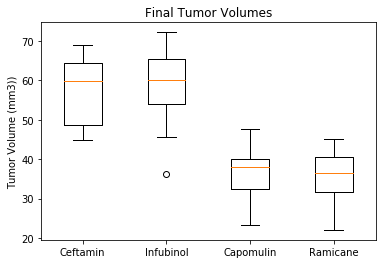

In [261]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3))')
ax1.boxplot([ceftamin, infubinol, capomulin, ramicane])
plt.xticks([1, 2, 3, 4], ['Ceftamin', 'Infubinol', 'Capomulin', 'Ramicane'])
plt.show()

## Line and scatter plots

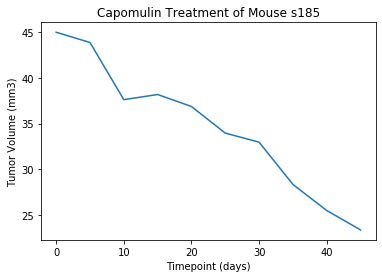

In [286]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_c = combined_study[combined_study["Mouse ID"] == "s185"]
x_axis = mouse_c['Timepoint']
y_axis = mouse_c['Tumor Volume (mm3)']
# Give our graph axis labels
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")
# Have to plot our chart once again as it doesn't stick after being shown
plt.plot(x_axis, y_axis)
plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

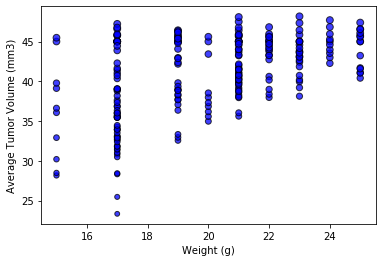

In [308]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_c = combined_study[combined_study["Drug Regimen"] == "Capomulin"]
mice_weight = mice_c["Weight (g)"]
mice_tumor = mice_c["Tumor Volume (mm3)"]

plt.scatter(mice_weight, mice_tumor, marker="o", facecolors="blue", edgecolors="black",
            s=mice_tumor, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


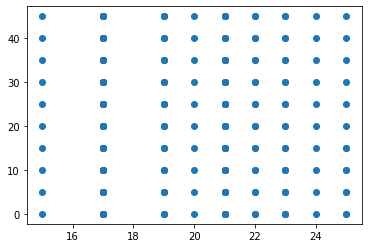

In [317]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mice_c_df = mice_c[['Weight (g)', 'Timepoint']]

mice_c_df.corr(method='pearson')


weight = mice_c_df['Weight (g)']
time = mice_c_df['Timepoint']
plt.scatter(weight, time)



